<a href="https://colab.research.google.com/github/pikey-msc/DeepLearn/blob/master/Notebooks/RedesNeuronalesRecurrentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Incruste de Palabras (Word Embedding)


## Incruste
Un incruste, o encaje, es en términos matemáticos una instancia de estructura matemáticas contenida en otra instancia.

Esto es, $x$ es puede ser una variedad, campo, grafo, etc y se mapea a otro espacio donde la estructura se preserva. ¿Cuál estructura? ¿Se requerirá a la distancia? ¿La conectividad topológica? ¿orden? En realidad, la que sea de nuestro interés.

Si la instancia original esta dada por $x \in X$, entonces la incrustación esta dada por

$$f:x \rightarrow y$$

tal que $f$ es una función que preserva la estructura de conectividad o algebraica.

En nuestro caso usaremos un incruste para transformar las palabras a vectores tal que una medida de distancia (o similaridad) se preserve.

Por ejemplo, sea $f$ la transformación que representa el incruste,

$$f : \text{'padre'} \rightarrow y_1 \\ f : \text{'madre'} \rightarrow y_2 \\ f : \text{'hijo'} \rightarrow y_3 \\ f : \text{'hija'} \rightarrow y_4$$
 

Entonces, si $f$ es un incruste que preserva distancias de significado, esperaríamos que

$$y_1-y_3 \approx y_2-y_4$$

Pero definir lo que es un incruste es mas fácil que calcularlo. Afortunadamente, las NN nos permiten calcular incruste de palabras muy eficientemente.

En el contexto de redes neuronales la incrustación pueden aprenderse a la par que se realiza la tarea (clasificación, predicción, etc.).

**Incruste mediante una NN:**

1. Mapea objetos con significado similar a puntos cercanos, con ello se pueden hacer buscas en vecindades.

2. Transforma los objetos a un espacio donde sean comparables, con ello se les puede procesar en un sistema de aprendizaje de máquina

3. Como consecuencia de los anterior, es posible analizar relaciones y conceptos.

## Incruste Uno-Activo (one-hot)
El incruste one-hot es el más básico de todos, consiste en mapear cada palabra a un vector indicador $e_i \in e$ (donde $e$ son la base canónica).

Para implementar esta esta incrustación, generalmente, se procede como sigue:

1. Elegir un lexicón (lista ordenada por frecuencia de uso de las palabras del lenguaje elegido).

2. Definir el tamaño del diccionario a utilizar (``max_features``). De todas la palabras en el lexicón, sólo se consideran las ``max_features-1`` palabras mas frecuentes, a cualquier otra palabra se le asigna un vector único, digamos el $e_{max-features}$
​
3. Asuma que $L(x, max-features)$ regresa el índice, válido, de la palabra $x$ en el lexicón. Realizar la incrustación:

$$y(x) = e_k \;\;\;\text{ tal que }\;\;\; k=L(x, max-features)$$

En la parte superior de la siguiente figura se ilustra como queda transformada una palabra en este esquema (one-hot).

La parte inferior ilustra un incruste aprendido de los datos del problema (lo veremos mas delante) con una NN.

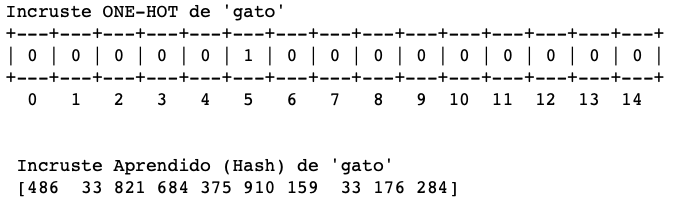

Características de uno y otro:

**ONE-HOT**

* Es muy simple de calcular

* tienen muy alta dimensión

* Es ralo: solo una entrada es diferente de cero, esta caliente).

**Aprendido por NN**

* Aprendido de los datos

* Baja dimensión

* Es denso: todas las entradas tienen valores.

Es importante que al calcular el incruste, las relaciones semánticas entre las palabras sean presevadas como relaciones geométricas en el nuevo espacio. Por ejemplo, que la distancia coseno entre dos incrustes tenga sentido:

$$L('leon')^\top L('tigre') > L('leon')^\top L('loro'),$$

o que

$$\| L('leon')- L('tigre')\|_2 < \| L('leon') - L('loro') \|_2$$


Es decir, esperamos que las palabras relacionadas en nuestro problema sean transformadas a puntos cercanos y que las palabras poco relacionadas correspondan a puntos distantes.

Más aun, esperamos que vectores obtenidos mediante operaciones con ‘palabras’ (en realidad con sus incrustes) tengan significado. Por ejemplo si calculamos

$$y = L('rey') - L('principe')$$

y luego hacemos
$$z = L('princesa') + y$$

resulte que

$$z \approx L('reyna')$$

Esto es, el vector $z$ se pueda interpretar como ‘coronación de un principe/princesa’

Lo que esperamos del incruste es que represente lo mas fielmente la relación semántica entre las palabras del lenguaje natural. Como dicha relación es dependiente del contexto en que se usan las palabras, la mejor práctica sería aprender el incruste a la vez que resolvemos la tarea de análisis de texto.

## Incruste Aprendido de los Datos
Para usar un incruste mediante NN, tenemos dos opciones: usar un preentrenado o entrenar un incruste para nuestro problema. La capa embedding es una capa mas. Veamos primero como se implementa una red con incruste aprendido de los datos.

Primero es importante que el incruste es realizado en dos partes:

* Las palabras son mapeadas a enteros (índices de un vocabulario).

* Dichos índies son transformados en un vector de flotantes que perservan afinidad semántica.

Estos pasos se representan gráficamente en la siguiente figura

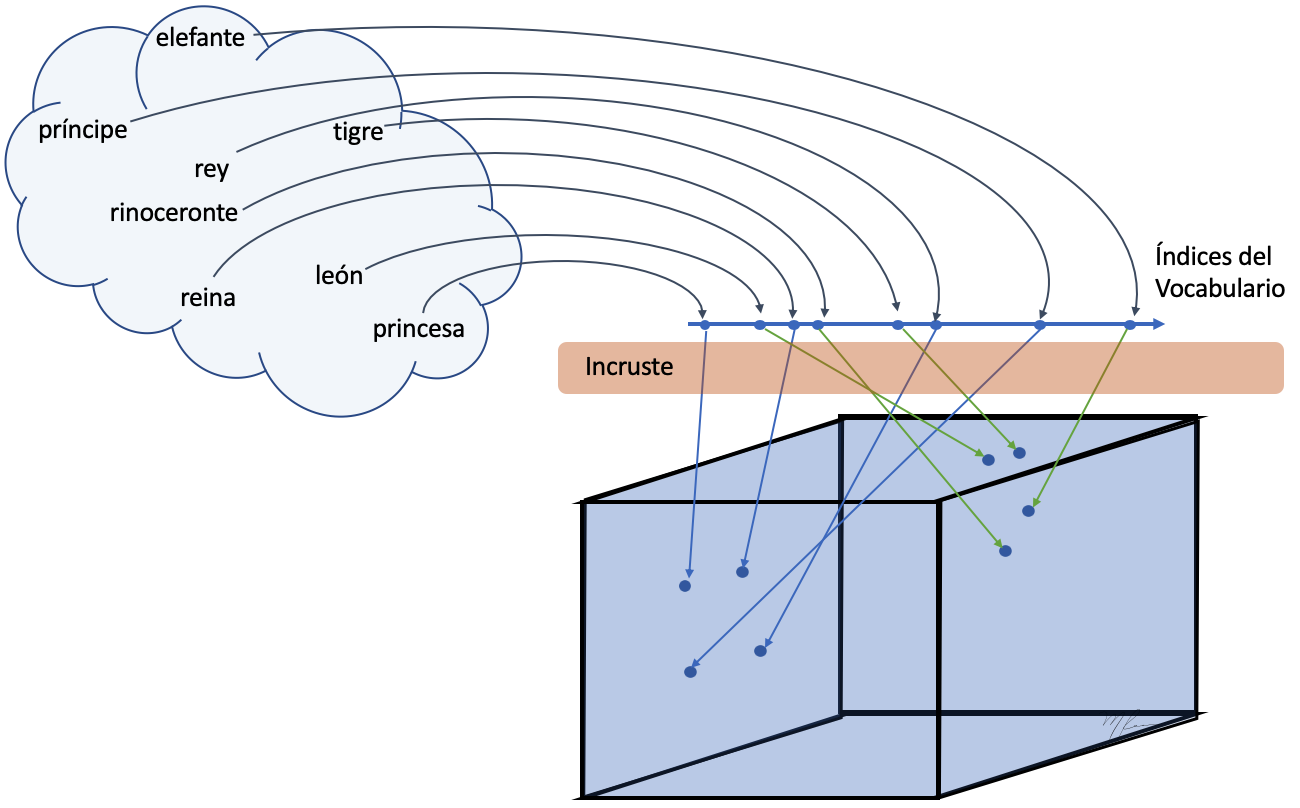

El incruste pueded entenderse como un diccionario, con palabras como llaves y con vectores como valores.

En Keras, la capa embedding esta definida por

``
keras.layers.Embedding(input_dim, 
                       output_dim, 
                       embeddings_initializer='uniform',
                       embeddings_regularizer=None, 
                       activity_regularizer=None, 
                       embeddings_constraint=None, 
                       mask_zero=False, 
                       input_length=None)
``                       
donde

**input_dim**: Tamaño del vocabulario

**output_dim**: Dimensión del incruste

**embedding_initializer**: inicializador

**input_length**: Longitud del párrafo

**embedding_regularizer**: Función de regularización de los pesos

**activity_regularizer**: Función de regularización a la activación de la capa

**embedding_constraint**: Retricción sobre los a los pesos

**mask_zero**: Si el valor 0 se usa para relleno del párrafo (padding).

Ya no se soportan los parámetros

**weights**: Pesos iniciales

**dropout**: fracción de incruste a desechar (dropout)

In [ ]:
from keras.layers import Embedding
# número máximo de palabars del lexicón que usaremos
max_features = 10000
# longitud máxima del parrafo
maxlen       = 20
# dimension del espacio  que se transforma cada palabra 
embedLen     = 8

embedding_layer = Embedding(input_dim=max_features, 
                    output_dim=embeddLen, 
                    input_length=maxlen)

Es es sólo una instacia de capa, no forma parte de ninguna red, mas delante mostramos el código que incluye la capa de incrustación en una red secuencial.

**Preparación de los datos**

Usamos como ejemplo el problema de predicción del sentimiento de revisión de películas de IMDB.

Restringiendo el vocabulario a las 10,000 palabras más comunes
y las truncando cada comentario a sólo maxlen palabras.

In [ ]:
from keras.datasets import imdb
from keras import preprocessing

# número máximo de palabars del lexicón que usaremos
max_features = 10000
# Longitud del párrafo
maxlen = 40

# Lectura de IMDB
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Recorte cada revisión (párrafo) a `maxlen` 
# y convertido en un arreglo de indices
x_train = preprocessing.sequence.pad_sequences(sequences=x_train, 
                                               maxlen=maxlen)
x_test  = preprocessing.sequence.pad_sequences(sequences=x_test, 
                                               maxlen=maxlen)

Ejemplo de párrafo codificado el vector de enteros (índices). Aun no estan incrustados.

In [ ]:
print("Ejemplo una revisión de película (índices da las primeras 'maxlen' palabras): \n",x_train[0])
print('Etiqueta:',y_train[0])

Definir el incruste de cada palabra a un espacio de dimensión embedLen a donde se mapean cada una de las 10,000 palabras.

Los datos son arreglos de párrafos (secuencia de secuencias de enteros) representados por un tensor de entero 2D. Cada entero (palabra) se incrustará en una secuencia de flotantes (tensor 3D de ``floats``). Cada párrafo (2D, es este momento) se reformaterá a para alimentar un clasificador definido por una capa ``Dense``

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding

# número máximo de palabars del lexicón que usaremos
max_features = 10000
# longitud máxima del parrafo
maxlen       = 40
# dimension del espacio  que se transforma cada palabra 
embedLen     = 8
# modelo secuencial
model = Sequential()
# capa de incruste
model.add(Embedding(input_dim=max_features, 
                    output_dim=embedLen, 
                    input_length=maxlen))
# aplanado de cada párrafo
model.add(Flatten())  
# capa clasificadora binaria
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Como notamos, todos los parámetros son entrenables, incluyendo los correspondientes a la capa de incruste. Entonces entrenamos la simultáneamente el incruste y el clasificador.

In [ ]:
history = model.fit(x_train, 
                    y_train,
                    epochs          =10,
                    batch_size      =32,
                    validation_split=0.2,
                    verbose         =2)

Logramos una precisión en los datos de validación cercana al 80%

Si incrementamos el tamaño del párrafo (20 son realmente muy pocas palabras) y usamos un espacio mayor de incruste.

In [ ]:
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding

# Tamaño del vocabulario : número máximo de palabras del lexicón que usaremos
max_features = 10000
# longitud máxima del párrafo
maxlen       = 100
# dimension del espacio  que se transforma cada palabra 
embedLen     = 20

# Lectura de IMDB
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Recorte cada revisión (párrafo) a `maxlen` 
# y convertido en un arreglo de indices
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# modelo secuencial
model = Sequential()
# capa de incruste
model.add(Embedding(input_dim    = max_features, 
                    output_dim   = embedLen, 
                    input_length = maxlen))
# aplanado de cada párrafo
model.add(Flatten())  
# capa clasificadora binaria
model.add(Dense(1, activation='sigmoid'))

# definimos los parámetros de entrenamiento 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

# entrenamos
history = model.fit(x_train, y_train,
                    epochs           = 10,
                    batch_size       = 32,
                    validation_split = 0.2,
                    verbose          = 2)

Mejoramos con una precisión en conjunto de validación alrededor del 86%

## Explorando el incruste para datos
Si una vez entrenada la red que incluye un incruste requerimos revisar el incruste de un párrafo en particular, lo que hacemos es crear un segundo modelo a partir del primero que regrese las salidas de todos las capas.

Primero, construimos un lote de procesamiento con un solo dato. Esto es, al párrafo a evaluar en su formato codificado en enteros. Se añade una dimensión que indica que es un lote de tamaño 1.

In [ ]:
import numpy as np
x = np.expand_dims(x_train[0], axis=0)

print('Tamaño del párrafo: ', x[0].shape)
print('Párrafo: ', x[0])

In [ ]:
from keras import models

layer_name = 'embedding_4'

# lista con las salidas de cada capa de la red 
layer_outputs = [layer.output for layer in model.layers[0:2]]

# nuevo modelo indicando la entrada y como salida la lista de salidas de cada capa
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# predicción del parrafo
embedding_output = activation_model.predict(x)

print('Predición \n (num párrafos, \n num palabras por párrafo, \n espacio',
	  ' del incruste de cada palabra): \n', embedding_output[0].shape)
print('Incruste de la primera palabra :',   embedding_output[0][0,0])

Alternativamente, se puede crear una función que evalúa únicamente una capa

Del módulo ‘backend’ usamos el método ‘function’ que instacía una función Keras

``keras.backend.function(inputs, outputs, updates=None)``


Parámetros

**inputs**: Lista de tensores de entrada

**outputs**: Lista de tensores de salida

**updates**: Lista de operaciones a actualizar

Luego, podemos llamar a la función creada con la lista de tensores parámetros de entrada y sin conexión a otras capas

``layer0_output = get_layer0_output([x])[0]``

In [ ]:
from keras import backend as K

# función que evalua una capa de 'model'
get_layer0_output = K.function([model.layers[0].input],
                               [model.layers[0].output])

# un solo párrafo como datos de entrada al lote   
layer0_output = get_layer0_output([x])[0]

print('Incruste de la primera palabra :', layer0_output[0][0])

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

plt.subplot(211)
plt.imshow(embedding_output[0][0].T)
plt.title('Método de Modelo con múltiples salidas (100 palabras)')

plt.subplot(212)
plt.imshow(layer0_output[0].T)
plt.title('Método de función que evalua una capa  (100 palabras)')

plt.show()

##Incruste Preentrenado
Si no contamos con datos suficientes, una opción es usar un incruste previamente calculado para un conjunto de datos suficientemente general. Entonces, el incruste preentrenado se usa como capa predefinida en nuestra NN.

Como en el caso de redes convolucionales preentrenadas, un incruste preentrenado no permite reusar características aprendidas en un problema mas general.

Entre los algoritmos mas existosos de cálculo de incrustes estan

**Word2Vec** [1, 2, 3]: Word to Vectors, basado en una NN que predice palabras a partir de otras en el contexto.

**GloVe** [4]: Global Vectors for Word Representation, basadio en factorización de matrices de coocurencias estadísticas. Keras trae entre sus bases de datos el encaje preentrenado GloVe para el ingés.

[1] Tomas Mikolov, Kai Chen, Greg Corrado, and Jeffrey Dean. Efficient es- timation of word representations in vector space. CoRR, abs/1301.3781, 2013.

[2] Tomas Mikolov, Ilya Sutskever, Kai Chen, Gregory S. Corrado, and Jeffrey Dean. Distributed representations of words and phrases and their compositionality. In Advances in Neural Information Processing Systems 26: 27th Annual Conference on Neural Information Processing Systems 2013. Proceedings of a meeting held December 5-8, 2013, Lake Tahoe, Nevada, United States, pages 3111–3119, 2013.

[3] Yoav Goldberg and Omer Levy, Word2vec Explained: deriving Mikolov et al.'s negative-sampling word-embedding method, ArXiv preprint, 1402.3722 (2014).

[4] J. Pennington, et al., Glove: Global Vectors for Word Representation, Proc. Conference on Empirical Methods in Natural Language Processing (EMNLP), 1532-1543, 2014

El incruste puede ser pensado como un diccionario en el cual las palabras, representadas como enteros, son la llave y el valor son el vector de alta dimensión incrustado. Su implementación práctica es mediate una matriz, donde cada palabra con índice ii se asocia con un vector renglón.

**Descargar la BD IMDB data**

De http://ai.stanford.edu/~amaas/data/sentiment/ descargar la BD “cruda” IMDB dataset: texto y etiquetas (positivo o negativo)

In [ ]:
!wget "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

In [ ]:
 !tar -zxvf aclImdb_v1.tar.gz

In [ ]:
import os

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Ejemplo de un comentario

In [ ]:
idx=20000
texts[idx]

In [ ]:
print('negativo' if labels[idx]==0 else 'positivo')

## Tokenización de los datos
**Tokenizer** es una clase que permite construir un diccionario de palabras a partir de textos y para su tokenización

Se vectorizan los textos que se descargaron y se separa un conjunto de entrenamiento y validación.

Usaremos los conceptos que apenas vimos.


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen             = 100    # Longitud maxima del la revisión, solo 100 palabras
training_samples   = 200    # Entrenar con 200 muestras
validation_samples = 10000  # Validar con 10,000 muestras
max_words          = 10000  # Diccionario de las 10,000 palabras mas frecuantes

tokenizer = Tokenizer(num_words=max_words)        # initialización del tokenizador
tokenizer.fit_on_texts(texts)                     # ajusta el tokenizador a los textos de entrenamiento
sequences = tokenizer.texts_to_sequences(texts)   # texto a secuencias de índices de palabras 

word_index = tokenizer.word_index                 # Diccionario {word : idx, ...}
print('{} tokens únicos encontrados.'.format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Forma del tensor de datos:', data.shape)
print('Forma del tensor de etiquetas:', labels.shape)

**Pares { Key : Value } del diccionario**

In [ ]:
def first_kpairs(mydict, k ):
    return list(mydict.items())[:k]

first_kpairs(word_index, k=20)

In [ ]:
print(texts[0], '\n')
print(sequences[0][-maxlen:], '\n')
print(data[0])

Las muestras estan ordenadas: primero todas las negativas y luego todas las positiva. Por lo que remezclamos los datos.

In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data   = data[indices]
labels = labels[indices]


**Descargar el incruste (embedding) de palabras GloVe** 

De https://nlp.stanford.edu/projects/glove/ descargar el incruste preentrenado a partir del texto en inglés de Wikipedia 123014.

Son aproximadamente 822MB en el archivo ZIP glove.6B.zip con una incruste de 400,000 palabras (y no-palabras) a vectores de dimensión 100.

Construyamos el diccionario con entradas de la forma ``{ 'palabra', incruste }``, donde incruste es el vector de flotantes de dimensión 100.

El archivo ‘glove.6B.100d.txt’ tienen el incruste GloVe, cada línea del archivo tienen el formato

   ``palabra val_1 val_2 ... val_100``

In [ ]:
!wget "http://nlp.stanford.edu/data/glove.6B.zip"

!unzip glove.6B.zip

In [ ]:
glovePath = '/content'

# diccionario
embeddingsDir = {}
f = open(os.path.join(glovePath, 'glove.6B.100d.txt'))
for line in f:
    # línea completa
    values = line.split()
    # primer elemento: palabra
    word   = values[0]
    # 100 coeficientes
    coefs  = np.asarray(values[1:], dtype='float32')
    embeddingsDir[word] = coefs
f.close()

print('Se encontraron {} pares palabra-vector.'.format(len(embeddingsDir)))

Analicemos unas palabras para ver como se ve su incruste.

In [ ]:
plt.figure(figsize=(8,6))
plt.subplot(311)
plt.plot(embeddingsDir['love'])
plt.plot(embeddingsDir['like'])
plt.title('love - like')
plt.subplot(312)
plt.plot(embeddingsDir['king'])
plt.plot(embeddingsDir['prince'])
plt.title('king - prince')
plt.subplot(313)
plt.plot(embeddingsDir['lion'])
plt.plot(embeddingsDir['tiger'])
plt.title('lion - tiger')
plt.show()


Es difícil a primera vista distinguir que tan distintas son, por ejemplo, palabras como ‘lion’ y ‘love’. Es mas informativo si calculamos la correlación entre los vectores.

In [ ]:
def showCorr(Corr, labels, cmap='jet'):
    plt.figure(figsize=(15,15))
    fig, ax1 = plt.subplots()
    cax=plt.imshow(Corr, cmap=cmap)
    ax1.set_yticklabels(['']+labels,fontsize=8)
    fig.colorbar(cax)
    plt.show()

names=['love', 'like', 'king', 'prince', 'tiger', 'lion', 'elephant','rhino','hyena']
embdd = np.array([embeddingsDir[name] for name in names])
Corr= np.corrcoef(embdd)

showCorr(Corr=Corr, labels=names, cmap='jet')

Construcción de la matriz de incruste ``embedding-matriz`` con forma ``(max_words, embedding_dim)``

El renglón $embedding-matrix_{i}$ contienen el vector de incruste, el $i$ es el índice de la palabra resultante de la tokenización

El índice 0 no corresponde a una palabra, sino a un marcador de inicio de párrafo.

In [ ]:
embedding_dim = 100

# inicialización de matriz de incruste, palabras no encontradas serán zeros 
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, idx in word_index.items():
    embedding_vector = embeddingsDir.get(word)
    # embedding_vector = embeddingsDir[word]  # Falla si 'word' tienen un apostrofe, como it's 
    # hacer el mapeo si está en las primeras `max_words` palabras
    if idx < max_words:
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

Hemos almacenado en ``embdedding_matrix`` el mapeo de la palabra $i$ correspondiente al índice del renglón con el vector de incruste almacenado como el vector renglon $i$-ésimo.

##Usando el Incruste en una NN
Con la misma arquitectura de red que probamos anteriormente

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout

model = Sequential()

model.add(Embedding(input_dim    = max_words, 
                    output_dim   = embedding_dim, 
                    input_length = maxlen))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'   ))
model.add(Dense(units=1,  activation='sigmoid'))
model.summary()

**Carga la matriz de GloVe en la capa de Incruste**

En el código anterior, usamos la capa ``Embedding`` que transforma cada palabra (con índice máximo de ``max_words``), en un párrafo de longitud ``maxlen``, a un arreglos de flotantes de tamaño ``embedding_dim``

Si $i$ es el código entero de una palabra, podriamos considerar el incruste como una función que regresa $i$-ésimo renglón de una matriz, donde cada renglón es el incruste de la palabra $i$.

Para cargar el incruste GloVe en el modelo se sustituyen los pesos de la capa (matriz de pesos) embedding y se define como capa no entrenable. Esto es

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

Note que, ahora se tienen 1,000,000 de pesos no entrenables en el modelo: ``max_words`` $\times$ ``embedding_dim``= $100000 \times 100$

## Entrenamiento y Evaluación
Compilamos,

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

entrenamos

In [ ]:
history = model.fit(data, labels,
                    epochs         = 20,
                    batch_size     = 32,
                    validation_split= 0.2,
                    shuffle        = True,      
                    verbose        =2)

y salvamos el modelo.

In [ ]:
model.save_weights('pre_trained_glove_model.h5')

Gráficas de desempeño

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,7))

plt.subplot(121)
plt.plot(epochs, acc,     'bo', label='Entrenamiento')
plt.plot(epochs, val_acc, 'g',  label='Validacion')
plt.title('Precisión (accuracy) de Entrenamiento y Validación')
plt.legend()

plt.subplot(122)
plt.plot(epochs, loss,     'bo', label='Entrenamiento')
plt.plot(epochs, val_loss, 'g',  label='Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.legend()

plt.show()

Tenemos problemas de sobreajuste (**overfitting**) del modelo en épocas muy tempranas. La la exectitud de la validación alcanza apenas el $72 \%$ en tanto sobre el entrenamiento se logra una clasificación prácticamente perfecta en épocas muy posteriores. Aún agregando ``Dropout`` el comportamiento no mejora.

Tratemos de usar un incruste no-preentrenado y que sea particular de nuestro problema.

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# El mismo modelo que usamos antes con incruste preentrenado
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(data, labels,
                    epochs         =10,
                    batch_size     =32,
                    validation_split=0.2,
                    shuffle        =True,
                    verbose        =2)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(epochs, acc,     'bo', label='Entrenamiento')
plt.plot(epochs, val_acc, 'g',  label='Validación')
plt.title('Precisión (accuracy) de Entrenamiento y Validación')
plt.legend()
plt.subplot(122)
plt.plot(epochs, loss,     'bo', label='Entrenamiento')
plt.plot(epochs, val_loss, 'g',  label='Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.legend()

plt.show()

Si bien mejora el desempeño del modelo en validación, desafortunadamente seguimos teniendo el problema de convergencia muy temprana

Para analizar secuencias de datos relacionados (como lo es el texto) es más conveniente usar redes recurrentes. Estos son redes que procesan palabra a palabra la entrada y tienen memoria de los datos que han fracasado. 

# Redes Neuronales Recurrentes
Cuando usamos una red convolucional como las de las secciones pasadas, la respuesta de la red es de esperarse que sea independiente de los datos que ha evaluado anteriormente. Es decir, no se espera que tenga memoria de lo que ha procesado y su respuesta no debe depender de los datos procesados anteriormente. La idea de las RRN es hacer uso de informacion secuencial. Esto es, para procesar datos en los cuales hay una dependencia de los datos procesados anteriormente; por ejemplo, en la predicción de series de tiempo como predecir el precio de una acción dada la información actual y los precios recientes del dicha acción.

El siguiente diagrama muestra esquemas de una red secuencial y una recurrente.

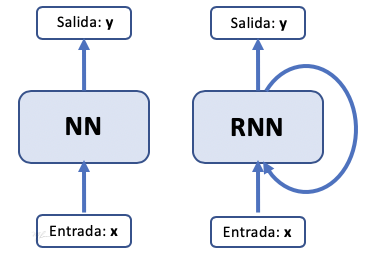

En este caso, la salida dependerá de los datos actuales y de los datos procesados anteriormente y de los cálculos realizados.

En la siguiente figura de esquematiza una red recurrente en la que se regresa todas las salidas de la secuencia procesada: desde $o_1$  hasta $o_n$.

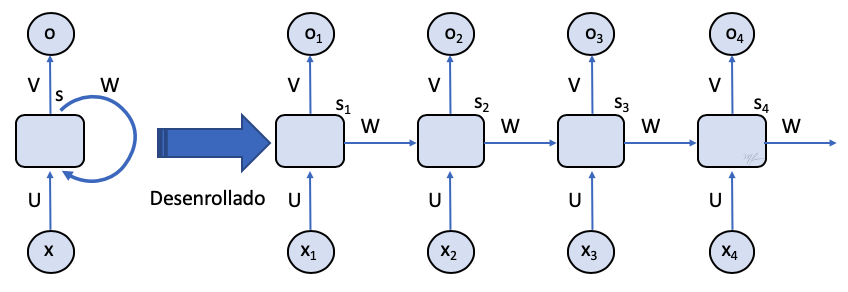

El diagrama de la izquierda muestra a una red recurrente, dicho diagrama puede desenrrollarse en el tiempo y verse como una red no recurrente. El diagrama desenrrollado de una RNN se extenderá tanto como el número de datos en el vector $x$. En este diagrama desenrrollado puede verse que dada

* $x_t$  es la entrada a tiempo $t$.

* $s_t$  es un estado oculto (interno, se denomina oculto porque no es observado ni como dato, ni como salida) a tiempo $t$ que se calcula mediante

$$s_t=\phi_1(Ux_t+Ws_{t-1})$$

donde $\phi_1$  es una función de activación

* $o_t$ es la salida a tiempo $t$ que se calcula con

$$o_t = \phi_2(V\, s_{t})$$

donde $\phi_1$  es una función de activación

El estado oculto $s_t$ **es la memoria de la red**: la información que del proceso del dato actual se transmite para procesar el nuevo dato.

Note que ahora, la red es definida por una sola unidad, celda o cell cuyo procesamiento implica a tres matrices de pesos: $U$, $V$, y $W$.

La siguiente figura ilustra los cálculos realizados por una unidad o **celda** de RNN.

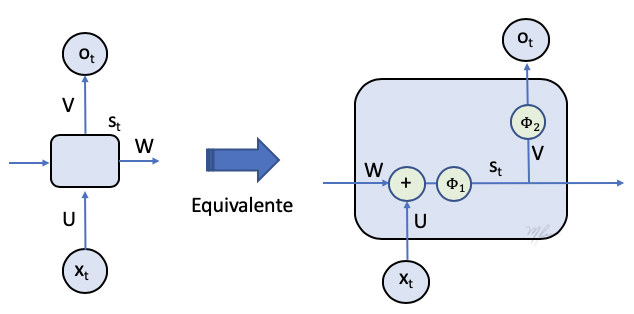

La clase *layer* de redes RNN

In [ ]:
import keras
keras.__version__
from keras.layers import SimpleRNN

Como cualquier otra layer de Keras, ``SimpleRNN`` procesa lotes de secuencias Numpy.

La entrada es de la forma ``(batch_size, timesteps, input_features)``

En vez de ``(timesteps, input_features)``.

Los elementos del tensor 3D de entrada se ilustran en la siguiente figura.

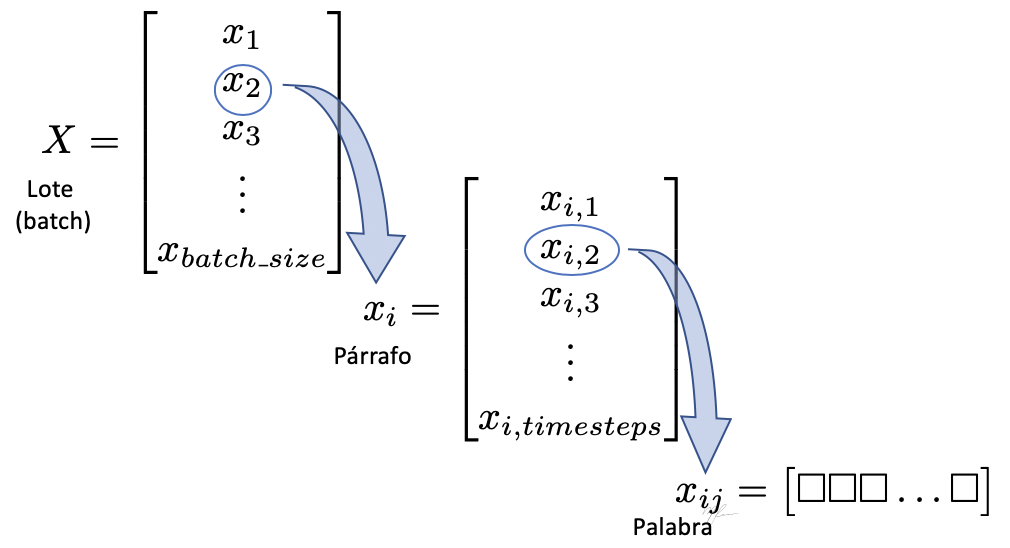

El lote se compone de párrafos, que a su vez se componen de palabras que han sido encajadas (embedded) en el espacio vectorial de dimensión ``input_features``. El tensor 3D se ilustra en la siguiente figura

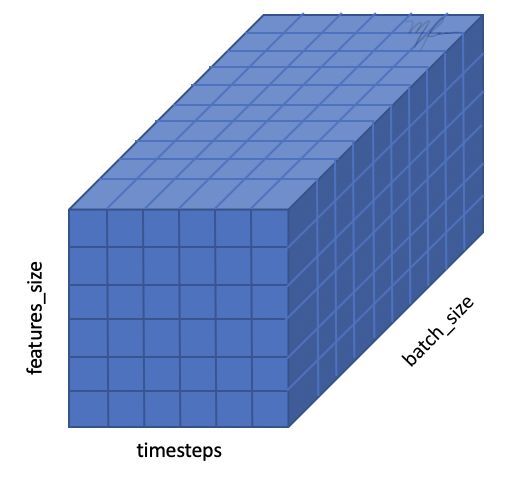

Se usa un *embedding* con tamaño de diccionario a los más de 10,000 y se mapean a dimensión un vector de dimensión 32.

``keras.layers.RNN(cell, 
                  return_sequences=False, 
                  return_state=False,  
                  go_backwards=False, 
                  stateful=False, 
                  unroll=False)
``

**cell** es una instancia de la clase celda RNN con 

* Un método `call(input_at_t, states_at_t)`  que regresa `(output_at_t, states_at_t_plus_1)`. El método `cell` puede tomar argumentos constantes adicionales.

* Atributo `state_size` entero que indica el tamaño del estado recurrente ($s$), de la misma dimensión que la salida $o$. Una dimensión por estado (pueded ser lista/tupla de enteros).

* Atributo `output_size` . Puede ser un entero o tensor representando la forma de la salida. Si no se define, se infiere de  `state_size`

**return_sequences y return_state**

La salida se controla mediante argumentos del constructor 

Si `return_state==True` : se regresa una lista de tensores de la forma (batch_size, units). El primer tensor es la salida y los restantes son los último estados.

Si `return_sequence==True`: se regresa un tensor 3D con forma (batch_size, timesteps, units). en otro caso un tensor 2Dcon forma (batch_size, units).

**go_backwards**: Si es `True`, se procesa la secuencia de entrada en orden inverso (de atrás hacia adelante) 

**stateful**:  Si es `True`,  el último estado de la muetsra de un lote es usado para continuar el procesamiento del siguiente lote. 

**unroll**:  Si es `True`, la red será desenrollada, en otro caso se usa un loop simbólico. Desenrollar una RNN pueded acelerar el procesamiento, es adecuado para secuencias cortas. 


**input_dim**: dimensión de la entrada (input_shape) is requerido si se usa un *layer* RNN como primera capa de un modelo

**input_length**: longitud de la secuencia de entrada. Requerido se si conecta a una *layer* *Flatten*. Permite calcular la dimensión de la salida.


 RNN que regresa únicamente la última salida de cada secuencia de entrada

Tensor 2D tensor de forma `(batch_size, output_features)`)



````
python
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
````

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))  
model.add(SimpleRNN(32))

Resumen de la arquitectura

In [ ]:
model.summary()

## RNN que regresa la secuencia de salida completa para cada secuencia procesada

Tensor 3D de forma ``(batch_size, timesteps, output_features))``

note el parámetro en
``model.add(SimpleRNN(32, return_sequences=True))``

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

##RNNs apiladas (Stack)
Esto nos permite incrementar la capacidad de a red

Es necesario que todas las capas intermedias regresan las secuencias completas

Excepto la última capa que, en este caso, regresa sólo la última salida de la secuencia procesada.

El siguiente diagrama ilustra capas RNN apiladas (stacked) en la que se regresa todas las salidas de la secuencia procesada: desde $y_1$  hasta $y_n$.

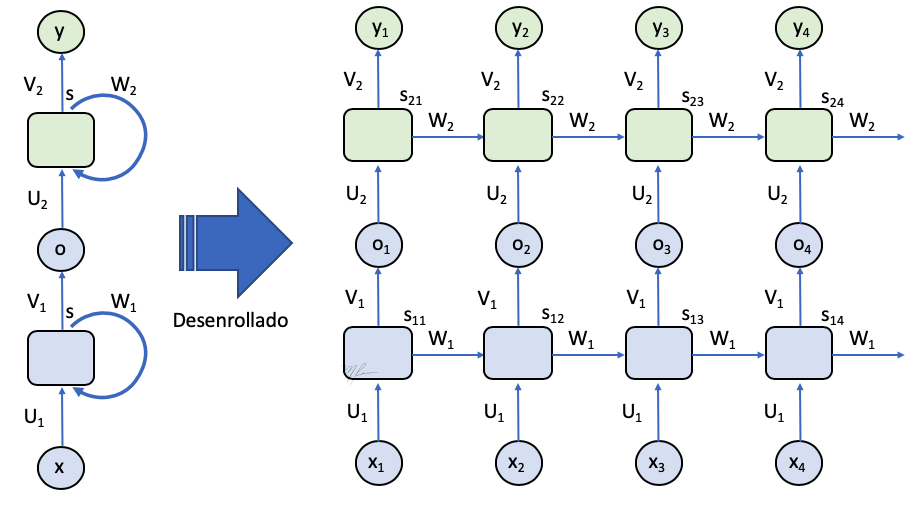

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # Salida de la ultima capa, solo de última celda
model.summary()

**Ejemplo con BD de clasificación de comentarios de películas**

Pre-procesamiento de los datos

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # tamaño del diccionario de palabras comunes
                      # (número de palabras a utilizar)
maxlen = 500          # longitud máxima de cada secuencia 
batch_size = 32

print('Cargando Datos...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'Secuencia de entrenamiento')
print(len(input_test),  'Secuencia de prueba')

#input_train[:] = (input_train[:])[-1::-1]

In [ ]:
print('*Pad* de las secuencias (muestras x longitud)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('Forma de input_train:', input_train.shape)
print('Forma de input_test:', input_test.shape)

RNN con una capa ``Embedding`` y una capa ``SimpleRNN`` que regresa solo una salida para cada secuencia


In [ ]:
from keras.layers import Dense

model = Sequential()
# Capa embedding
# input_dim : tamaño del vocabulario
# output_dim: dimensión del vector al que se mapea
model.add(Embedding(input_dim=max_features, output_dim=32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
import time
tic = time.time()
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=2)
print('Tiempo de entrenamiento:', time.time()-tic)

**Gráficas del función de pérdida y de la precisión**

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Pérdida')
plt.legend()

plt.show()

Llegamos alrededor de 85% de precisión en el conjunto de validación, una red densa simple llegó al 88%.

Parte del problema es que sólo consideramos las primeras 500 palabras, que son menos que la que accesaba la red original.

**Ejemplo con Stack de RNNs**

In [ ]:
from keras.layers import Dense

model = Sequential()
# Capa embedding
# input_dim : tamaño del vocabulario
# output_dim: dimensión del vector al que se mapea
model.add(Embedding(input_dim=max_features, output_dim=32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc'])

import time
tic = time.time()
history_stackRNN = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=2)
print('Tiempo de entrenamiento:', time.time()-tic)

El tiempo por época es prácticamente el doble, 102 secs por época en Tesla GPU y 1000 p/época en TPU.

Pero no mejora el desempeño, precisión de validación de cerca de 86% en la segunda época.

Apilando 3 RNNs, seguimos en el 85% de precisión en el conjunto de validación. 37 secs. por época en Tesla GPU

In [ ]:
import matplotlib.pyplot as plt

acc = history_stackRNN.history['acc']
val_acc = history_stackRNN.history['val_acc']
loss = history_stackRNN.history['loss']
val_loss = history_stackRNN.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Precisión')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Pérdida')
plt.legend()

plt.show()

Alargar las secuencias no mejora con la RNN, pues no son buenas para recordar términos cortos por mucho tiempo. Tampoco el apilar agregar RNNs. Veamos una red especialista en estos casos

#Red de Memoria Corta a Largo Plazo (Long-Term Short Memory, LTSM)

Similarmente a la ``SimpleRNN`` que recién vimos, usamos los defaults y vemos como se comporta.

La celda de la LTSM se ilustra a continuación



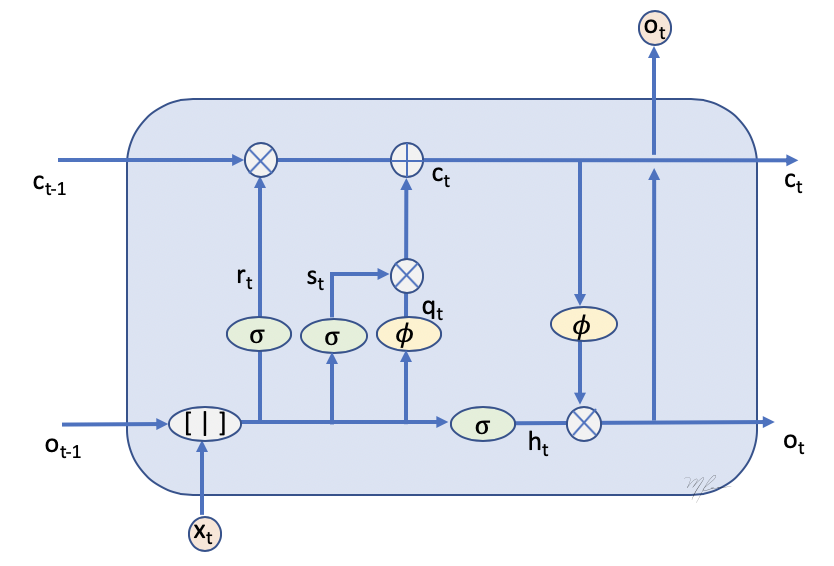

En esta ilustración, notamos las siguientes variables:

* $x_t$ es la entrada en el tiempo $t$.

* $o_{t-1}$  es la salida de la celda en tiempo t-1t−1, la salida anterior.

* $c_{t-1}$  es la información (memoria) que es pasada por la estapa anterior.

* $c_{t}$  es la informacion que es pasada a la sigiente etapa.

Luego, la celda tienen tres entradas $[x_t , o_{t-1}, c_{t-1}]$ y tres salidas $[o_t, c_t]$.

* Las $\phi$'s denotan funciones de activación, generalmente tangente hiperbólicas.

* La operación $[\; | \;]$ denota concatenación de las entradas.

* El operador $\oplus$ denota suma de tensores.

* Las funciones $\sigma$ son sigmoides que aproximan a una respuesta binaria, $\{0,1\}$. Su operación en combinación con el producto $\otimes$ pueden entenderse como switches que permiten el flujo, o no, de la información. Ver la siguiente figura.



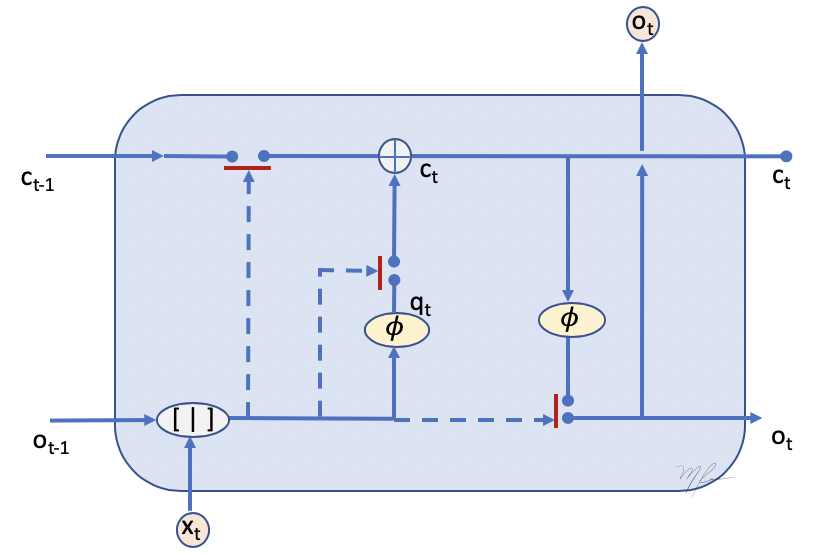

## Canal de memoria

La memoria de término largo permite que la información pase desde $c_{t-1}$ a $c_t$.

Luego la memoria se obtienen como la suma de información de en la memoria $c_{t-1}$  que deseamos preservar y la información nueva $q_t$  que deseamos agregar al la memoria:

$$c_t = r_t * c_{t-1} + s_t * q_t$$

donde la información $q_t$ a agredar se obtiene a partir de procesar la entrada y la salida anterior:

$$q_t = \phi(W_q [x_t | o_{t-q}] + b_q)$$

donde $r_t$  y $s_t$  son switches que controlan el “olvido” de la memoria pasada y la nueva información nueva a “recordar”.

Dependiendo de los datos $x_t$ y de la salida anterior $o_{t-1}$, la celda “olvidará” lo que el canal de memoria ha conservado.

El switch de “reseteo” de memoria se calcula mediante:

$$r_t = \sigma(W_r [x_t | o_{t-q}] + b_r)$$

donde el $b_r$ representa el bias.

El switch para agregar información a la memoria se calcula mediante:

$$s_t = \sigma(W_s [x_t | o_{t-1}] + b_s)$$

donde el $b_s$ representa el bias.

## Canal de salida

La célula dará como salida una selección del resultado de procesar el contenido actualizado de la memoria.
$$o_t = h_t * \phi ( W_o \, c_t + b_o)$$

donde el switch de selección se calula usando

$$h_t = \sigma(W_h [x_t | o_{t-1}] + b_h)$$

donde el $b_h$  representa el bias.

Para mas información en el tema, ver Ref S. Hochreiter and J. Schimidhuber, Longe short-term memory, Neural Computation, 9(8), 1735-1780, 1997 y el blog de Colah, donde se disculten otras variantes.

# La capa LSTM de KERAS

````
keras.layers.LSTM(units, 
                  activation='tanh', 
                  recurrent_activation='hard_sigmoid', 
                  use_bias=True, 
                  kernel_initializer='glorot_uniform', 
                  recurrent_initializer='orthogonal', 
                  bias_initializer='zeros', 
                  unit_forget_bias=True, 
                  kernel_regularizer=None, 
                  recurrent_regularizer=None, 
                  bias_regularizer=None, 
                  activity_regularizer=None, 
                  kernel_constraint=None, 
                  recurrent_constraint=None, 
                  bias_constraint=None, 
                  dropout=0.0, 
                  recurrent_dropout=0.0, 
                  implementation=1, 
                  return_sequences=False, 
                  return_state=False, 
                  go_backwards=False, 
                  stateful=False, 
                  unroll=False)
````


En el caso de Keras, la implementación de la LSTM esta dada por


**Salida**

La salida de la celda con:

(11)
$$
o_t = \phi( W_{x} x_t + W_{o} o_{t-1} + W_c c_{t-1} + b_o)
$$

que incluye el efecto de los datos $x_t$, el el estado anterior (salida) $o_{t-1}$ y la memoria acumulada $c_{t-1}$


**Canal de Memoria**

Y el canal de memoria se actualiza similarmente como en (3):

(9)
$$
 c_t =  r_t * c_{t-1} + s_t * q_t
$$

La diferencia mayor esta en que los demás componentes se calculan con

(10)
$$
r_t = \phi( W_{rx} x_t + W_{ro} o_{t-1} + b_r) \\
s_t = \phi( W_{sx} x_t + W_{so} o_{t-1} + b_s) \\
q_t = \phi( W_{qx} x_t + W_{qx} o_{t-1} + b_q) 
$$

Note que se usa una sola funcion de activación, 




Creamos el modelo con la incrustación (embedding)

In [ ]:
from keras.layers import LSTM

print('Número máximo de palabras a usar:', max_features)
model = Sequential()
model.add(Embedding(max_features, 32))


Incluimos una capa LSTM

In [ ]:
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Parámetros de entrenamiento

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

y entrenamos

In [ ]:
tic=time.time()
history = model.fit(input_train, y_train,
                    epochs=6,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=2)
print('tiempo de entrenamiento: ', time.time()-tic)

**Gráficas del función de pérdida y de la precisión**

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np

print('La precisión alcanza un {}%'.format(np.array(val_acc).max()*100))

#Redes con Unidades Recurrentes con Compuertas (Gated-RU)

[3] K. Kyunghyun et al. Learning Phrase Representations using RNN Encoder–Decoder for Statistical Machine Translation, Proc EMNLP, 1724-1734 (2014)

Otro tipo de redes recurrentes inspripadas en las LSTM son las Redes Recurrentes con Conpuertas (Gated Recurrent Neuranl Networks, GRU). Dichas redes mejoran la memoria de largo tiempo a un costo computacional menor que las LSTM a costa de un menor desempeño. Son un punto medio entre las RRN y las LSTM. Su simpleza permite que sean ampliamente usadas, dado que son mas fáciles de entrenar y son más rápidas en la inferencia que las LSTM. Estas redes fueron propuestas en [3] para realizar la tarea de traducir del inglés al francés. El modelo es entrenado para aprender la probabilidad de traducción de una frase en inglés a una frase en francés.

La notación de las GRN es:

* $x_t$: dato en tiempo actual (entrada)

* $o_t: salida en tiempo actual

* o_{t-1}: salida en el tiempo previo (memoria)

En estas redes, la salida y la memoria van por el mismo conducto, se puede ver a oo como la estimación actual de la red dada la información al momento disponible.

Exiten dos switches (gates) denominados:

1. Switch de “reset”, que hace a la unidad olvidar lo acumulado en memoria para calcular su nueva salida:

$$r_t = \sigma(W_{rx} x_t + W_{ro} o_{t-1} +b_z)$$

2. Switch de actualización, que hace que la solcuión acumulada sea actualizada o se usa la solución anterior como solución de la unidad actual. Es es útil para los casos en que la información actual no aporta información relevante.

$$z_t = \sigma(W_{zx} x_t + W_{zo} o_{t-1} +b_z)$$

La salida de la red se selecciona con $z$ mediante

$$o_t = z_t o_{t-1} + (1-z_t) \tilde o_t$$

donde $$\tilde o_t $$ es la respuesta de la red dada la información disponible: $x_t$ y $o_{t-1}$. Se calcula mendiante

$$\tilde o_t = \phi(W x_t + r_t \odot \tilde o_{t-1})$$

donde $\odot$ representa el producto punto a punto, aquí es donde se olvida o no la información en la memoria.

Gráficamente la GRU se ilustra en la siguiente figura

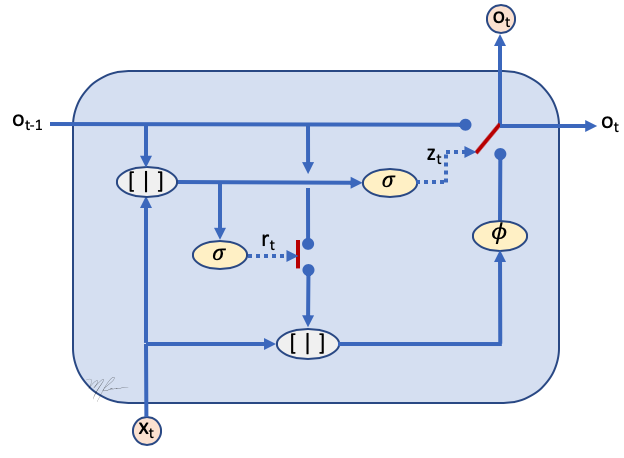

Es más claro si analizamos sólo la construcción de la salida, e indicamos los switches (los cuales se aprenden a partir de la información accesible a la unidad), vea la siguiente figura.

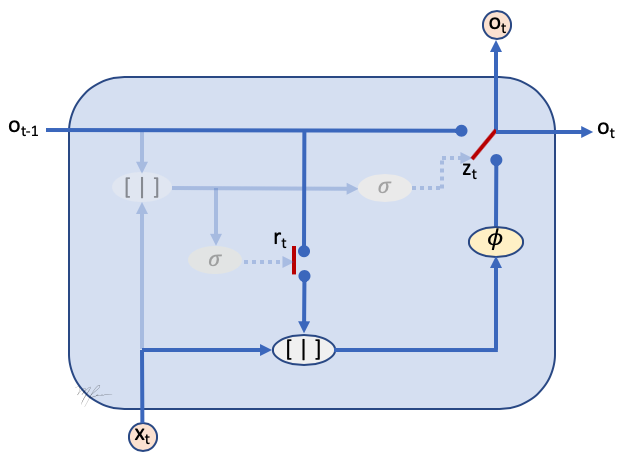

De esta figura vemos que

1. Las entradas a la celda son la salida de la celda anterior y el dato actual.

2. La salida de la celda anterior puede o no (switch $r_t$) usarse para procesarse en la celda.

3. La celda calcula una respuesta tomando en cuenta la entrada actual y (en su caso) la memoria.

4. La salida de la celda se elige (switch $z_t$) de entre la salida anterior (memoria) o la procesada por la celda.

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # tamaño del diccionario de palabras comunes
                      # (número de palabras a utilizar)
maxlen = 500          # longitud máxima de cada secuencia 
batch_size = 32

print('Cargando Datos...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'Secuencia de entrenamiento')
print(len(input_test),  'Secuencia de prueba')

print('*Pad* de las secuencias (muestras x longitud)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [ ]:
from keras.models import Sequential
#from keras import layers
from keras.layers import Dense, GRU, Embedding

model = Sequential()
# Capa embedding
# input_dim : tamaño del vocabulario
# output_dim: dimensión del vector al que se mapea

model.add(Embedding(input_dim=max_features, output_dim=32))
# comentar la siguiente linea para evaluar dropout 
model.add(GRU(32))
# descomentar la siguiente linea para evaluatr dropout 
#model.add(GRU(32, dropout=.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
import time
tic = time.time()
history_GRU = model.fit(input_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.2,
                        verbose=2)
print('Tiempo de entrenamiento:', time.time()-tic)

**SIN DROPOUT**: Logramos en mejor desempeño de 87.44%, muy cercano a la LSTM de 87.6%, con una red mas simple.

**CON DROPOUT**: No hay mejora, de hecho alcanza una precisión del 95%, por debajo del mismo modelo si no usamos doropout. Para este caso, el sobreajuste no es el principal problema, debe ser el tamaño de la DB, la cual es relativamente pequeña.

# Redes Recurrentes Bidireccionales (B-RNN)



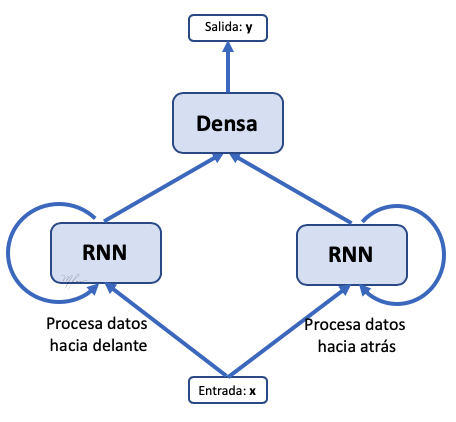

Keras provee una celda que ya combina las dos redes recurrentes (la que procesa en orden hacia delante y la que procesa en order inverso) y que integra en una sola salida ambas respuestas, la forma de crear una RNN (LSTM en este caso) bidireccional en Keras se detalla en seguida.

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # tamaño del diccionario de palabras comunes
                      # (número de palabras a utilizar)
maxlen = 500          # longitud máxima de cada secuencia 
batch_size = 32

print('Cargando Datos...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'Secuencia de entrenamiento')
print(len(input_test),  'Secuencia de prueba')

print('*Pad* de las secuencias (muestras x longitud)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [ ]:
from keras.models import Sequential
#from keras import layers
from keras.layers import Dense, LSTM, Bidirectional, Embedding

model = Sequential()
# Capa embedding
# input_dim : tamaño del vocabulario
# output_dim: dimensión del vector al que se mapea

model.add(Embedding(input_dim=max_features, output_dim=32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
import time
tic = time.time()
history_STLM = model.fit(input_train, y_train,
                         epochs=10,
                         batch_size=128,
                         validation_split=0.2,
                         verbose=2)
print('Tiempo de entrenamiento:', time.time()-tic)

El desempeño en un poco mejor, cercano al **89%**, ya supera a una red Densa que logra un desempeño del 88%.

# El Problema del Gradiente Evanescente

[1] R. Pascanu et al., On the difficulty of training recurrent neural networks. In Proc. ICML’13, vol 28, pp III–1310–III–1318, (2013)

En problema conocido del entrenamiento de las redes recurrentes en el llamado Gradiente Evanescete (vanish gradient). [1]

Para analizar dicho problema, primero usaremos un ejemplo con la finalidad de motivar el problema.

Suponga que hemos entrenado una red para completar oraciones y la entrenamos con oraciones como la siguiente:

> Al gato la gusta jugar con los niños, …, descansar en su cojín y comer pescado

Donde ‘…’ significan que hay varias palabras mas.

Luego le pedimos a la red predecir la siguiente palabra en la siguiente oración:

> *Al perro la gusta jugar con los niños, …, descansar en su cojín y comer ________ *

Y la red predice **pescado**, cuando esperabamos **huesos**.

¿Que fué lo que pasó? ¿En que falló el entrenamiento? Bueno, pues la palabra que define de quién estamos hablando (gato o perro) está al inicio de la oración, y la red tiene **memoria corta**. Esto es, nuestra red no es muy buena para recordar datos importantes por mucho tiempo.

La razón es que en las redes recurrentes el efecto en la salida de los palaras se desvanece rápidamente. Es decir, modificar las palabras iniciales de la oración tienen muy poco efecto (si no es que nulo) en la última salida de la RNN.

Esto implica que el el cambio en el costo de la última predicción se desvanece conforme los términos son más tempranos: el gradiente se desvanece rápidamente en el tiempo. Matemáticamente, esto se escribe como


$$\frac{\partial E(o_t, O_t)}{\partial {x_k}}\bigg\uparrow_{t-k} \approx 0$$

Donde $o_t$ es la salida de la RNN para el tiempo $t$ y $O_t$   es la salida esperada (usada en el entrenamiento supervisado) y $x_k$  es una entrada muy distante en el tiempo.

Para analizar esto, asumamos una RNN muy simple, como la de la siguiente figura.



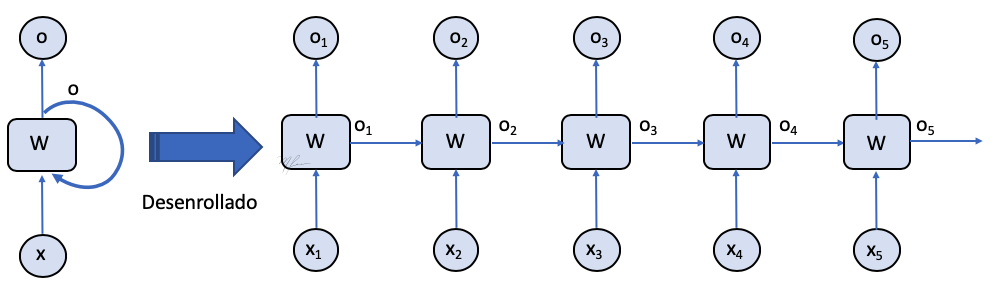

Donde la celda esta definida por la simple función de transformación:

$o_t = \phi(W_x\, x_t + W_o \, o_{t-1} + b)$

Donde $\phi$ es una función de activación y definimos $W = [W_x, W_o, b]$. Luego agregamos, gráficamente, la etapa de cálculo del error. Entonces la RNN se ve como

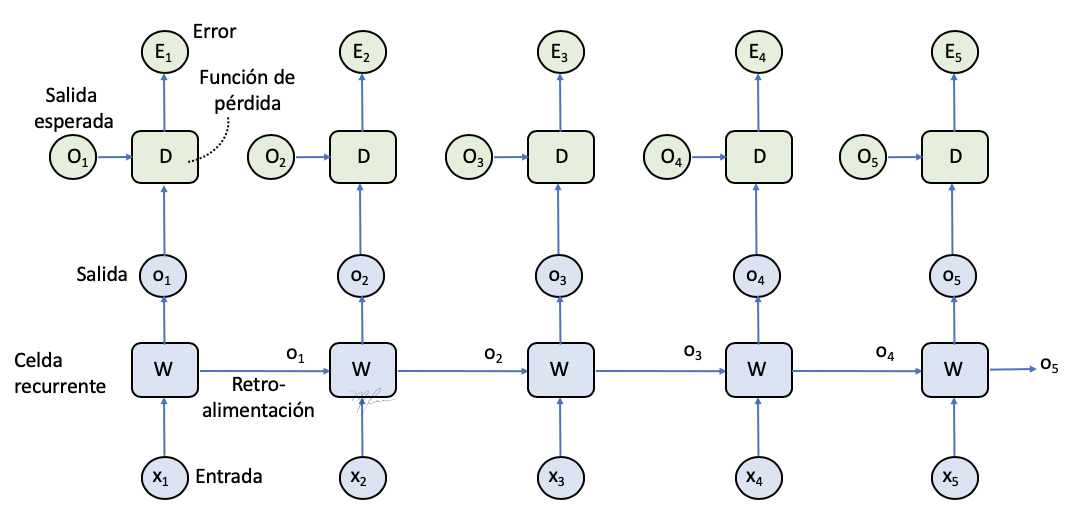

Donde, $E_t$  es el error entre la predicción $o_t$ y la salida esperada $O_t$ considerando la tt-ésima entrada $x_t$​	y la retroalimentación $o_{t-1}$.

Luego, el error total cometido esta dado por

$$E = \sum_{t=0}^T E_t$$

y el gradiente de la función de error respecto a los parámetros $W$ es

$$\nabla_W E \overset{def}{=}\frac{\partial E}{\partial W} = \sum_{t=0}^T \frac{\partial E_t}{\partial W}$$

que es la suma de las contribuciones de cada salida al gradiente.

Por lo pronto, consideremos sólo la salida final, 

1.  Notamos que un cambio en WW afectará directamente a $o_5$. Gráficamente: se ilustra en la figura siguiente.



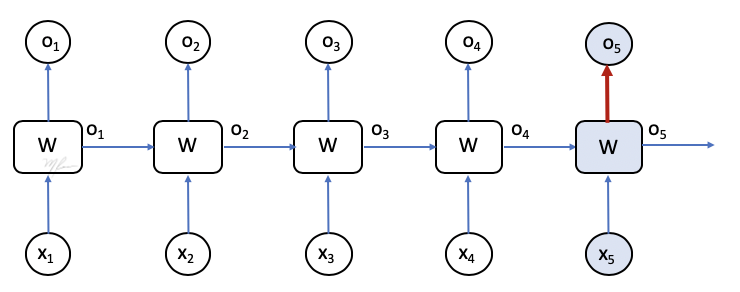

2. Sin ambargo, la entrada $o_4$ a la última celda también se ve afectada por un cambio en $W$.


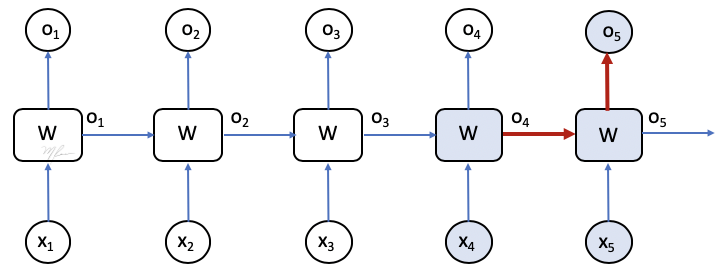

3 Que a su vez se ve afectada por un cambio en $o_3$  inducido por el cambio en $W$.

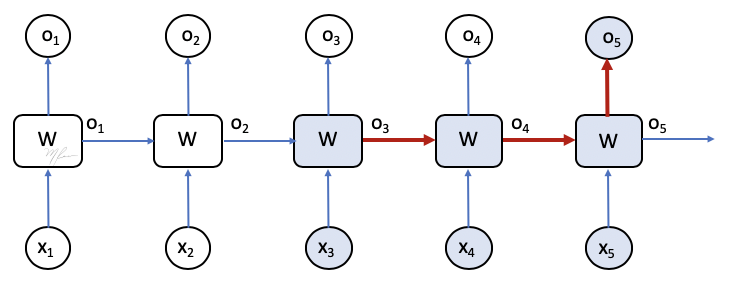

De hecho, por la naturaleza recursiva de nuestra red, un cambio en $W$ afecta directamente todas las salidas de la red, y este cambio se propaga a través del canal de memoria.

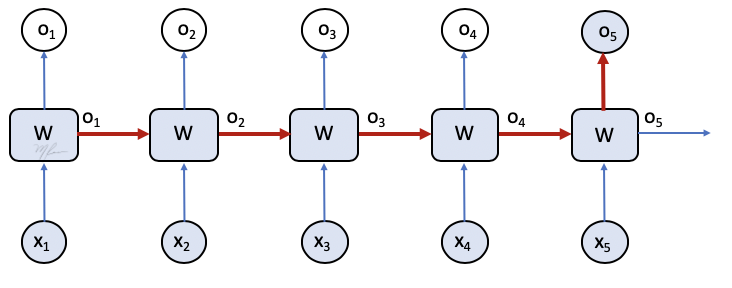

Entonces el gradiente en la salida tt-ésima esta dado por

(5)


$$\begin{matrix} \frac{\partial E_t}{\partial W} & = \frac{\partial E_t}{\partial o_t} \frac{\partial o_t}{\partial W} & \text{Cambio directamente en la celda final $t$} \\ & + \frac{\partial E_t}{\partial o_t} \frac{\partial o_t}{\partial o_{t-1}} \frac{\partial o_{t-1}}{\partial W} & \text{Cambio inducido por la celda previa $t-1$}\\ & + \frac{\partial E_t}{\partial o_t} \frac{\partial o_t}{\partial o_{t-1}} \frac{\partial o_{t-1}}{\partial o_{t-2}} \frac{\partial o_{t-2}}{\partial W} & \text{Cambio inducido por la celda ante-previa $t-2$} \\ & + \frac{\partial E_t}{\partial o_t} \frac{\partial o_t}{\partial o_{t-1}} \frac{\partial o_{t-1}}{\partial o_{t-2}} \frac{\partial o_{t-2}}{\partial o_{t-3}} \frac{\partial o_{t-3}}{\partial W} & \text{Cambio inducido por la celda $t-3$} \\ & + \frac{\partial E_t}{\partial o_t} \frac{\partial o_t}{\partial o_{t-1}} \frac{\partial o_{t-1}}{\partial o_{t-2}} \frac{\partial o_{t-2}}{\partial o_{t-3}} \frac{\partial o_{t-3}}{\partial o_{t-4}} \frac{\partial o_{t-4}}{\partial W} & \text{Cambio inducido por la celda $t-4$}\\ & + \ldots & \text{Cambio inducido por el resto de las celdas} \end{matrix}$$


que podemos reescribirlo como

$$
\frac{\partial E_t}{\partial W} = \sum_{k=1}^t \frac{\partial E_t}{\partial o_t} \frac{\partial o_{t}}{\partial o_k} \frac{\partial o_{k}}{\partial W}
$$ 

Donde hemos definido

$$\frac{\partial o_{t}}{\partial o_k} \overset{def}{=}\prod_{i=k}^{t-1} \frac{\partial o_{i}}{\partial o_{i-1}}$$


 

Ahora, veamos cada término

$$\frac{\partial o_{i}}{\partial o_{i-1}} = \frac{\partial}{\partial o_{i-1}} \phi(W_x\, x_i + W_o \, o_{i-1} + b) \\ \;\;\;\;\;\;\;\;\;\;\;\; W_o \, \phi^\prime(W_x\, x_i + W_o \, o_{i-1} + b)$$
Sustituimos la última en la anepenúltima:

$$\frac{\partial o_{t}}{\partial o_k} = \prod_{i=k}^{t-1} W_o \, \phi^\prime(W_x\, x_i + W_o \, o_{i-1} + b) \\ \;\;\;\;\;\;\;\;\;\;\;\; = (W_o)^{t-k-1} \prod_{i=k}^{t-1} \phi^\prime(W_x\, x_i + W_o \, o_{i-1} + b)$$

Ahora
$$\frac{\partial o_{k}}{\partial W} = \frac{\partial}{\partial W} \phi( W \, [x_k, o_{k-1}, \mathbf{1}]^\top) \\ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; = [x_k, o_{k-1}, \mathbf{1}]^\top \, \phi^\prime(W \, [x_k, o_{k-1}, \mathbf{1}]^\top)$$
donde usamos $W = [W_x, W_o , b]$

Y el primer término $\frac{\partial E_t}{\partial o_t} $
depende únicamente de la función de error DD que usemos.

Poniendo todo junto en antepenúltima pregunta:

$$
\boxed{ \frac{\partial E_t}{\partial W} = \sum_{k=1}^t \left( \frac{\partial E_t}{\partial o_t} \; [x_k, o_{k-1}, \mathbf{1}]^\top \, \phi^\prime(W \, [x_k, o_{k-1}, \mathbf{1}]^\top ) \underbrace{(W_o)^{t-k-1}}_{\mathbf !} \underbrace{ \prod_{i=k}^{t-1} \phi^\prime(W_x\, x_i + W_o \, o_{i-1} + b)}_{\mathbf !} \right) }$$

Lo importante es la aparición de los términos

$$(W_o)^{t-k-1}$$
 , que consiste en elevar a una potencia la matriz $W_o$. Si la matriz $W_o$
  contienen únicamente términos | $[W_o]_{ij} | \lt 1$, al elevarlos a potencias grandes (para k&lt;&lt;tk<<t), se harán mas pequeños y la contribución de la entrada $[x_k, o_{k-1}, \mathbf{1}]$ se desvanecerá.
Podemos factorizar $W = U \, D \, V^\top$ usando descomposición en valores singulares (Singular Value Decompossition, SVD). Donde $D$ es una matriz diagonal con los valores singulares y $U$, $V$ som matrices unitarias ($U^\top U = U U^\top = IU$$ 

y $$V^\top V = V V^\top V = IV $$

Luego $W^n = W^{n-2} W^\top W = W^{n-2} V \, D^2 \, V ^\top $.
Note que este producto pueded cambiar si elegimos multiplicar por la izquierda y si nn es par o impar; pero lo escencial es que el producto es de la forma $W^n = A D^n B$ (con $A,B \in \{U,U^\top, V, V^\top\}$. Donde $D^n$ significa que cada valor singular es elevado a la potencia $n$. Si $n\gt\gt0$ y $D_{ii}\lt0$ y $W^n \approx 0$.

$$\prod_{i=k}^{t-1} \phi^\prime$$, si asumimos que $\phi(z) = \tanh(z)$, entonces $\phi \in (-1,1)$. Luego $\phi^\prime = 1-\phi^2$ con $\phi^\prime \in (0,1)$. Consecuentemente, $\prod_{i=k}^{t-1} \phi^\prime \approx 0$ para $k \lt\lt t$
Por ello, las RNN no pueden usar términos tempranos kk para construir respuestas a tiempos muy distantes $t$ (con $k\lt\lt t$).



**El Problema de la Explosión del Gradiente** 

En redes profundas no recurrentes se ha visto otro problema asociado con el producto de gradientes.

Si la matriz $W_o$ contienen únicamente términos $| [W_o]_{ij} | \gt 1$ y el producto (potencia)de matrices crece más rapidamente que el producto de las parciales. Entonces, el gradiente explotará hacendose extremadamente grande y provocando el llamado problema de Explosión del Gradiente [2], que es el opuesto al de Gradiente Evanescente y generalmente se resuelve mediante:

1. Regularizando (penalizando) los pesos $W$ con norma $L_1$  o $L_2$ 
2. Recortando gradientes excesivamente grandes.
3. Truncando backpropagation cundo hay gradientes grandes.

[2] Y. Bengio et al., The Problem of Learning Long-Term Dependencies in Recurrent Networks, Neural Networks for Computing Conference, 1993.